In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# for Classifcation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Data Exploration:

### PassengerId: A unique identifier for each passenger.

### Survived: This is the target variable, with values 0 (indicating the passenger did not survive) or 1 (indicating the passenger survived).

### Pclass: The passenger's class (1st, 2nd, or 3rd class).

### Name: The passenger's name.

### Sex: The passenger's gender (male or female).

### Age: The passenger's age.

### SibSp: The number of siblings/spouses aboard.

### Parch: The number of parents/children aboard.

### Ticket: The ticket number.

### Fare: The fare paid for the ticket.

### Cabin: The cabin number.

### Embarked: The port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

In [3]:
df1=pd.read_csv(r"C:\Users\salma elbadry\Desktop\Projects\inter career\task1\train.csv")
df2=pd.read_csv(r"C:\Users\salma elbadry\Desktop\Projects\inter career\task1\test.csv")
df3=pd.read_csv(r"C:\Users\salma elbadry\Desktop\Projects\inter career\task1\gender_submission.csv")
print(df1.shape)
print(df2.shape)
print(df3.shape)



(891, 12)
(418, 11)
(418, 2)


# Data Preprocessing:

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df1.isna().sum()/len(df1)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df1.drop("Cabin",axis=1,inplace=True)

In [7]:
df1["Age"].fillna(df1["Age"].mean(),inplace=True)

In [8]:
df1["Embarked"].fillna(df1["Embarked"].mode()[0], inplace=True)

In [9]:
df1.isna().sum()/len(df1)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [10]:
df1["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

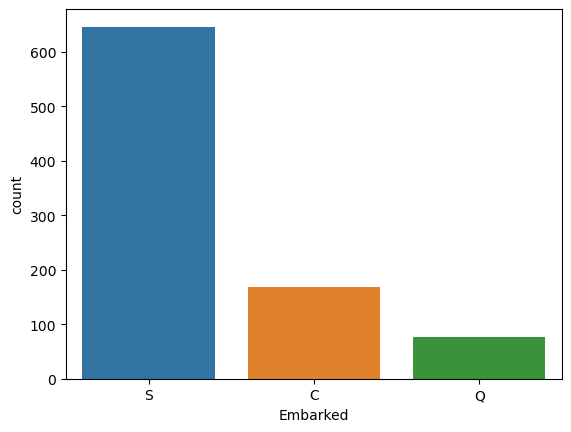

In [11]:
sns.countplot(data=df1, x="Embarked")

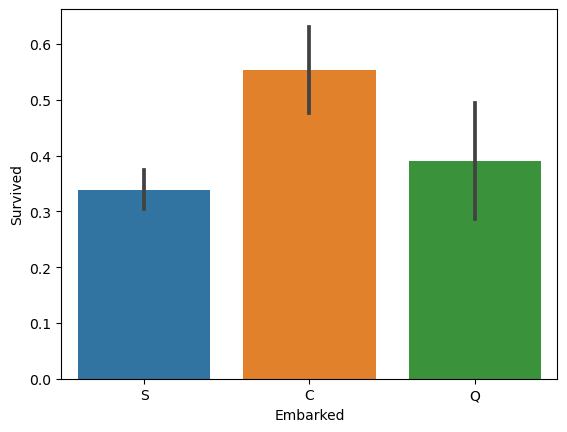

In [12]:
sns.barplot(data=df1,x="Embarked",y="Survived")
plt.show()

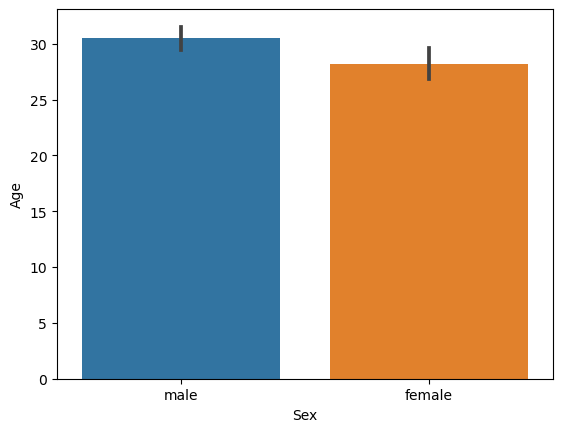

In [13]:
sns.barplot(data=df1,x="Sex",y="Age")
plt.show()

In [14]:
df1["Sex"].unique()

array(['male', 'female'], dtype=object)

<Axes: xlabel='Sex', ylabel='count'>

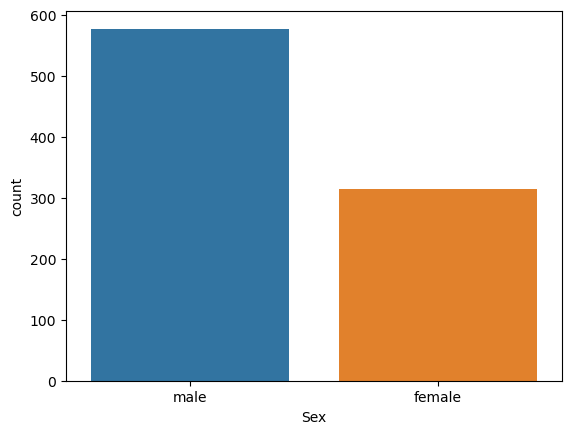

In [15]:
sns.countplot(data=df1, x="Sex")


<Axes: xlabel='SibSp', ylabel='Survived'>

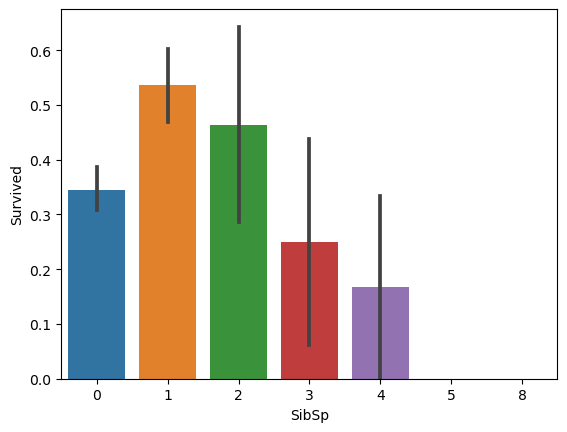

In [16]:
sns.barplot(data=df1,x="SibSp",y="Survived")


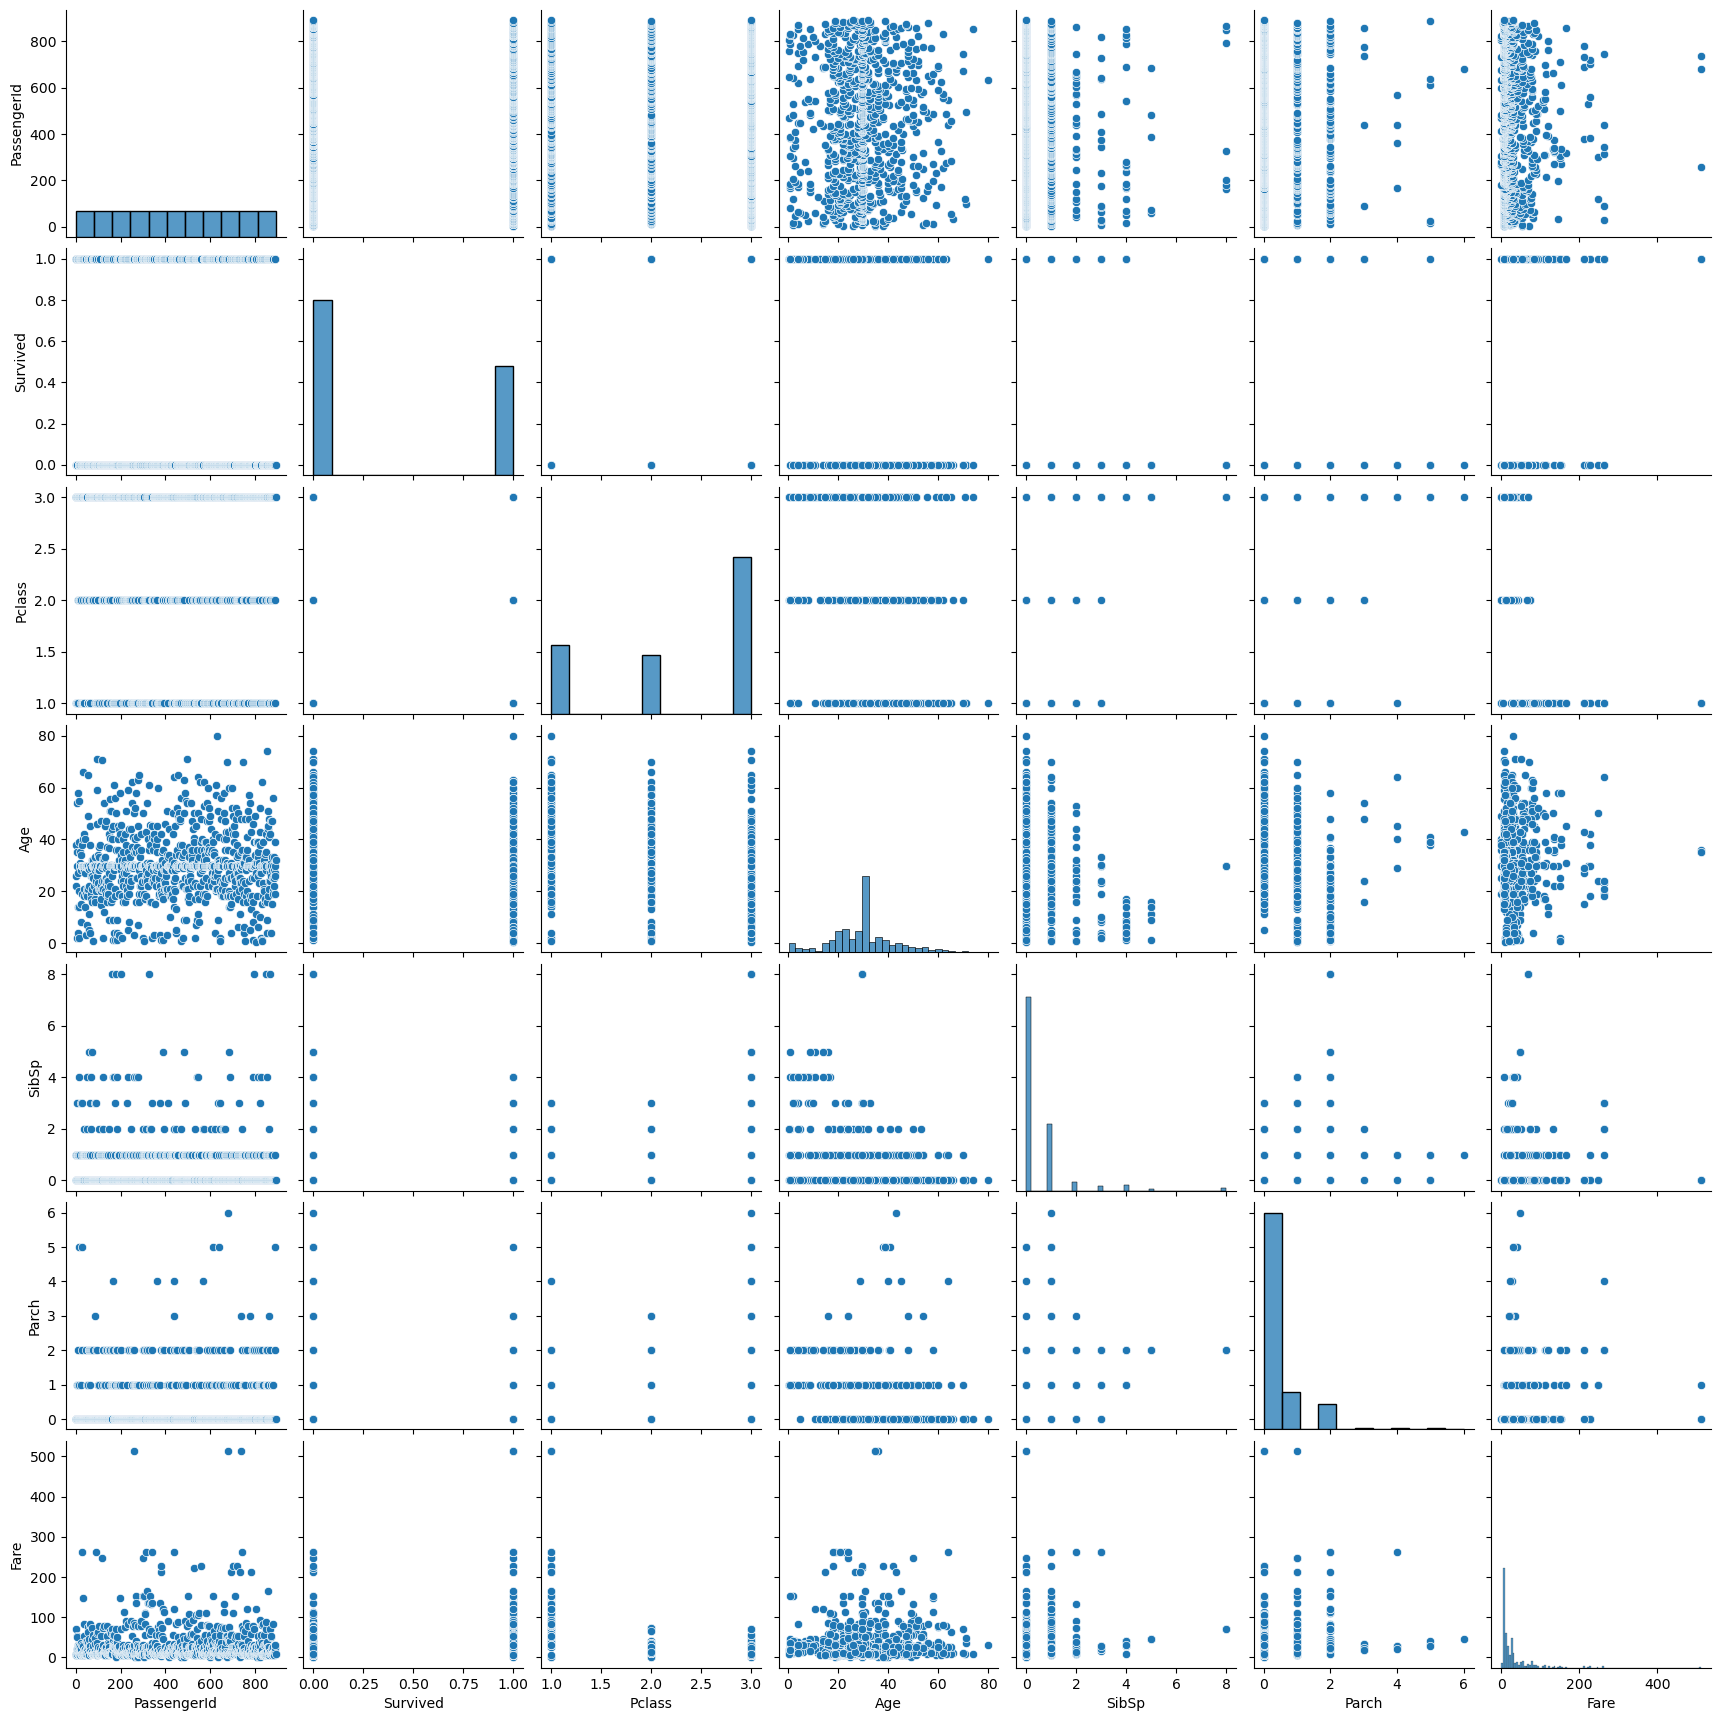

In [17]:
sns.pairplot(df1)
plt.show()


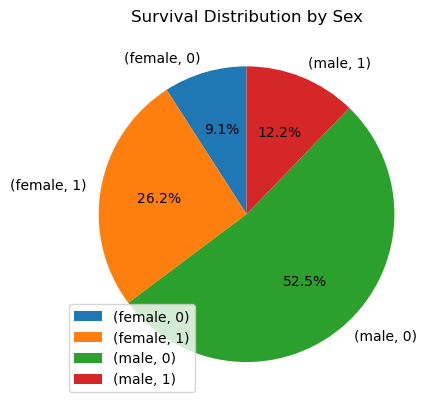

In [18]:
sex_survived = df1.groupby(['Sex', 'Survived']).size()
sex_survived.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Survival Distribution by Sex')
plt.ylabel('')
plt.show()

# Model Building:


In [19]:
label_encoder = LabelEncoder()
df1["Sex"] = label_encoder.fit_transform(df1["Sex"])
df1["Embarked"] = label_encoder.fit_transform(df1["Embarked"])

In [20]:
df1["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [21]:
columns_to_drop = [ "PassengerId", "Name", "Ticket"]
df1.drop(columns=columns_to_drop, inplace=True)


In [22]:
x=df1.drop("Survived",axis=1)
y=df1["Survived"]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,shuffle=True,random_state=168)


In [24]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
338,3,1,45.000000,0,0,8.0500,2
703,3,1,25.000000,0,0,7.7417,1
505,1,1,18.000000,1,0,108.9000,0
822,1,1,38.000000,0,0,0.0000,2
325,1,0,36.000000,0,0,135.6333,0
...,...,...,...,...,...,...,...
439,2,1,31.000000,0,0,10.5000,2
301,3,1,29.699118,2,0,23.2500,1
313,3,1,28.000000,0,0,7.8958,2
255,3,0,29.000000,0,2,15.2458,0


In [25]:
y_train

338    1
703    0
505    0
822    0
325    1
      ..
439    0
301    1
313    0
255    1
725    0
Name: Survived, Length: 712, dtype: int64

In [26]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
df2["Age"].fillna(df1["Age"].mean(),inplace=True)
df2["Fare"].fillna(df1["Fare"].mean(),inplace=True)
df2["Embarked"].fillna(df1["Embarked"].mode()[0], inplace=True)

In [28]:
label_encoder = LabelEncoder()
df2["Sex"] = label_encoder.fit_transform(df2["Sex"])
df2["Embarked"] = label_encoder.fit_transform(df2["Embarked"])

In [29]:
x_test = df2.drop(["PassengerId","Ticket","Name","Cabin"], axis=1)  
print(x_test.shape)
x_test.isna().sum()

(418, 7)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
y_test=df3["Survived"]
print(y_test.shape)

(418,)


In [31]:
best_svm = SVC()
best_svm.fit(x_train, y_train)

SVC()

In [32]:
# Example assuming X_train, X_test, y_train, y_test are already defined

# Ensure the features in x_test match the features the model expects
#x_test = preprocess_features(x_test)  # You may need to adjust this based on your preprocessing steps

# Verify the dimensions of x_test and y_test
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Now, make predictions and calculate metrics
y_pred = best_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


x_test shape: (418, 7)
y_test shape: (418,)


# Model Evaluation:


In [33]:
y_pred = best_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.65
Precision: 0.55
Recall: 0.26
F1-Score: 0.36


# Model Tuning:

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # Tuning gamma for 'rbf' kernel
}

grid_search = GridSearchCV(best_svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [36]:
best_params

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [40]:
# Train the model with the best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(x_train, y_train)

# Model Evaluation
y_pred = best_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation to assess model stability
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Print the evaluation metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


<Axes: >

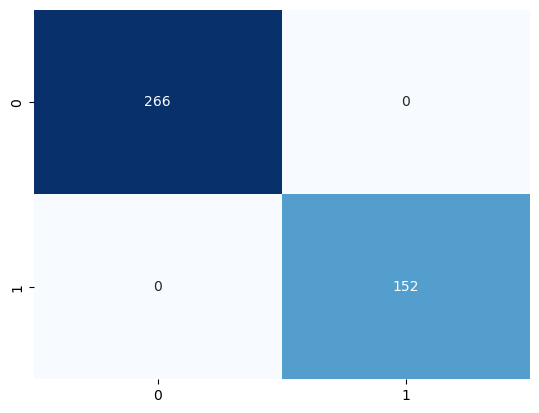

In [38]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
#annot بيبن الكلام على المربعات

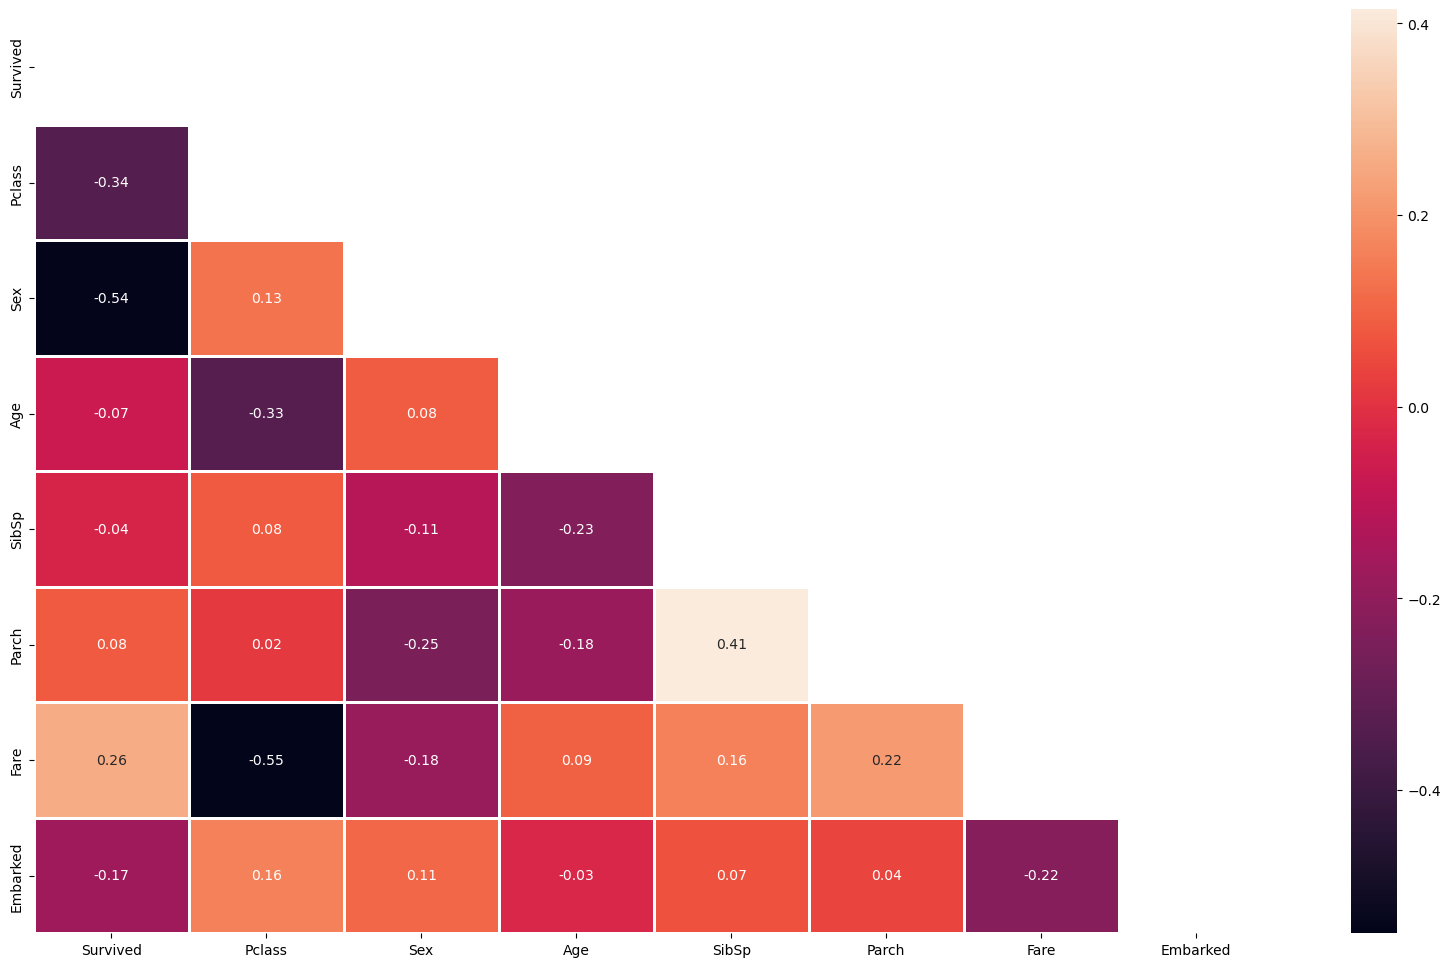

In [39]:
plt.figure(figsize = (20, 12))

corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()